# Autoencoder for Satellite dataset

In [1]:
import pandas as pd
import numpy as np
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [2]:
#read data
x_train = pd.read_csv('./dataset/sat_train.csv')
x_test = pd.read_csv('./dataset/sat_test.csv')
y_train = pd.read_csv('./dataset/sat_train_label.csv')
y_train = np.asarray(y_train)
y_test = pd.read_csv('./dataset/sat_test_label.csv')
y_test = np.asarray(y_test)

In [3]:
## Normalization
#x_train.max().max()
x_train = x_train.astype('float32') / 157.
x_test = x_test.astype('float32') / 157.

In [4]:
y_test

array([[3],
       [3],
       [4],
       ...,
       [5],
       [5],
       [5]])

# Basic Autoencoder

In [97]:
########### Basic Autoencoder ##########
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 8
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 36)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 296       
_________________________________________________________________
dense_20 (Dense)             (None, 36)                324       
Total params: 620
Trainable params: 620
Non-trainable params: 0
_________________________________________________________________


In [39]:


ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test, x_test)
                ).history

Train on 4435 samples, validate on 2000 samples
Epoch 1/200
4435/4435 [==============================] - 0s 70us/step - loss: 0.0234 - val_loss: 0.0180
Epoch 2/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0163 - val_loss: 0.0152
Epoch 3/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0144 - val_loss: 0.0137
Epoch 4/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0133 - val_loss: 0.0129
Epoch 5/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0126 - val_loss: 0.0124
Epoch 6/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0122 - val_loss: 0.0119
Epoch 7/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0119 - val_loss: 0.0115
Epoch 8/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0115 - val_loss: 0.0111
Epoch 9/200
4435/4435 [==============================] - 0s 8us/step - loss: 0.0111 - val_loss: 0.0106
Epoch 10/200
4435/4435 [

4435/4435 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 80/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 81/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 82/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 83/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 84/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 85/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 86/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 87/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 88/200
4435/4435 [==============================] - 0s 11us/st

Epoch 157/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 158/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 159/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 160/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 161/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 162/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 163/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 164/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 165/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 166/200
4435/4435 [============================

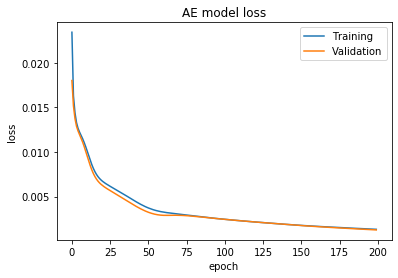

In [40]:
# AE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [41]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.003521
std,0.003034
min,0.001324
25%,0.001771
50%,0.002453
75%,0.003736
max,0.023419


In [42]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.003318
std,0.002725
min,0.001257
25%,0.001755
50%,0.002448
75%,0.003252
max,0.018006


In [43]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [44]:
encoded_som.head()

,0,1,2,3,4,5,6,7
0,0.0,0.214918,1.129380,0.0,1.101194,0.461256,0.634595,0.672134
1,0.0,0.172555,1.152339,0.0,1.105224,0.462174,0.636067,0.666911
2,0.0,0.157411,0.900301,0.0,0.911588,0.407731,0.445517,0.521917
3,0.0,0.213926,0.872880,0.0,0.846269,0.464452,0.415377,0.478968
4,0.0,0.216366,0.849333,0.0,0.837768,0.421976,0.396192,0.498435


In [47]:
encoded_data.mean()

0.45587128

In [48]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6
1995,0.553358,0.729503,0.187408,0.789887,0.188233,0.753118,0.869085
1996,0.593841,0.550664,0.326164,0.612031,0.051632,0.624883,0.868620
1997,0.523561,0.510507,0.259064,0.587196,0.044986,0.500826,0.733869
1998,0.557289,0.642132,0.249553,0.570662,0.205687,0.586527,0.683223
1999,0.780255,0.658296,0.403594,0.533067,0.091198,0.720527,0.865444


In [49]:
encoded_som_nonzero.to_csv(path_or_buf='./sat_AE_encoded.csv',index= False)

# Sparse Autoencoder

In [122]:
########### Sparse Autoencoder ##########
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-7))(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test, x_test)
                ).history

Train on 4435 samples, validate on 2000 samples
Epoch 1/200
4435/4435 [==============================] - 0s 92us/step - loss: 0.0229 - val_loss: 0.0181
Epoch 2/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0167 - val_loss: 0.0157
Epoch 3/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0150 - val_loss: 0.0142
Epoch 4/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0137 - val_loss: 0.0129
Epoch 5/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0126 - val_loss: 0.0118
Epoch 6/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0116 - val_loss: 0.0109
Epoch 7/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0108 - val_loss: 0.0101
Epoch 8/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0101 - val_loss: 0.0094
Epoch 9/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0094 - val_loss: 0.0088
Epoch 10/200
443

4435/4435 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0033
Epoch 80/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 81/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 82/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 83/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0032
Epoch 84/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 85/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 86/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 87/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0031
Epoch 88/200
4435/4435 [==============================] - 0s 9us/step - loss:

Epoch 157/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0018 - val_loss: 0.0019
Epoch 158/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 159/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 160/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 161/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 162/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 163/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0018
Epoch 164/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 165/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 166/200
4435/4435 [===========================

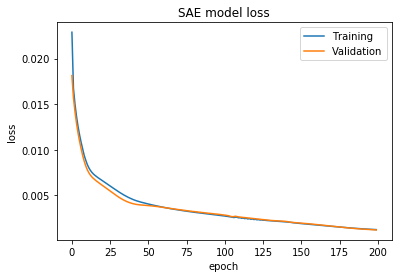

In [123]:
# SAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('SAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [124]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.003582
std,0.002855
min,0.001233
25%,0.001906
50%,0.002734
75%,0.004051
max,0.022888


In [125]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.003452
std,0.002512
min,0.001200
25%,0.001953
50%,0.002837
75%,0.003875
max,0.018135


In [126]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [131]:
encoded_data.mean()

0.19548284

In [127]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.442497,0.151610,0.206632,0.0,0.0,0.218555,0.279418,0.442487,0.0,0.872129,0.0,0.000000
1,0.495470,0.086018,0.175026,0.0,0.0,0.154667,0.331902,0.450411,0.0,0.889451,0.0,0.000000
2,0.355215,0.000000,0.147549,0.0,0.0,0.273261,0.306045,0.355911,0.0,0.748749,0.0,0.017409
3,0.276200,0.010565,0.176352,0.0,0.0,0.291826,0.229986,0.348940,0.0,0.718656,0.0,0.042865
4,0.262522,0.021445,0.171532,0.0,0.0,0.271645,0.203328,0.341682,0.0,0.697918,0.0,0.080053


In [128]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

In [129]:
encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

In [130]:
encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7
1995,0.387692,0.406194,0.205906,0.103922,0.364590,0.160046,0.620461,0.067357
1996,0.379159,0.356151,0.280715,0.163460,0.374971,0.000000,0.471289,0.182745
1997,0.360583,0.289250,0.348469,0.133371,0.218664,0.000000,0.433544,0.204931
1998,0.194437,0.279660,0.278754,0.034335,0.329406,0.080450,0.413424,0.176662
1999,0.256853,0.421904,0.300119,0.057415,0.418423,0.039746,0.415670,0.202156


In [132]:
encoded_som_nonzero.to_csv(path_or_buf='./sat_SAE_encoded.csv',index= False)

# Contractive Autoencoder

In [130]:
########### Contractive Autoencoder ##########
input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu', name = 'encoded')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

lam = 10e-7

def contractive_loss(y_pred, y_true):
    
        mse = K.mean(K.square(y_true - y_pred), axis=1)
        W = K.variable(value=autoencoder.get_layer('encoded').get_weights()[0])
        W = K.transpose(W)
        h = autoencoder.get_layer('encoded').output
        dh = h * (1 - h)
        contractive = lam * K.sum(dh**2 * K.sum(W**2, axis=1), axis=1)

        return mse + contractive
    
autoencoder.compile(optimizer='adadelta', loss= contractive_loss)
ae_train = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                ).history

Train on 4435 samples, validate on 2000 samples
Epoch 1/200
4435/4435 [==============================] - 1s 164us/step - loss: 0.0213 - val_loss: 0.0182
Epoch 2/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0173 - val_loss: 0.0167
Epoch 3/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0161 - val_loss: 0.0158
Epoch 4/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0152 - val_loss: 0.0149
Epoch 5/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0143 - val_loss: 0.0141
Epoch 6/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0136 - val_loss: 0.0134
Epoch 7/200
4435/4435 [==============================] - 0s 13us/step - loss: 0.0129 - val_loss: 0.0128
Epoch 8/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0124 - val_loss: 0.0124
Epoch 9/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0120
Epoch 10/200
44

4435/4435 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 156/200
4435/4435 [==============================] - 0s 15us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 157/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 158/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 159/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 160/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 161/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 162/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 163/200
4435/4435 [==============================] - 0s 11us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 164/200
4435/4435 [==============================] - 0

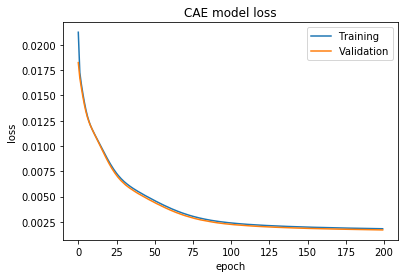

In [131]:
# CAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('CAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [132]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.003973
std,0.003334
min,0.001817
25%,0.001981
50%,0.002395
75%,0.004613
max,0.021252


In [133]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.003811
std,0.003248
min,0.001702
25%,0.001858
50%,0.002253
75%,0.004421
max,0.018248


In [134]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [135]:
encoded_data.mean()

0.31003293

In [136]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.794206,0.0,0.120736,0.216592,1.476388,0.592430,0.692733,0.0,0.0,0.0
1,0.0,0.0,0.816276,0.0,0.137616,0.202824,1.511296,0.642235,0.674722,0.0,0.0,0.0
2,0.0,0.0,0.769959,0.0,0.091751,0.197358,1.153303,0.461900,0.624151,0.0,0.0,0.0
3,0.0,0.0,0.785560,0.0,0.125687,0.183826,1.081301,0.412930,0.640337,0.0,0.0,0.0
4,0.0,0.0,0.753468,0.0,0.112133,0.208300,1.041194,0.401044,0.629156,0.0,0.0,0.0


In [137]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6
1995,0.561580,0.634534,0.570987,1.203641,0.584229,0.576371,0.0
1996,0.508694,0.740950,0.645241,1.034415,0.517116,0.533473,0.0
1997,0.495993,0.697974,0.591894,0.866980,0.465010,0.599563,0.0
1998,0.570517,0.637723,0.607751,0.890813,0.363513,0.499826,0.0
1999,0.488311,0.896041,0.667947,1.110583,0.518453,0.459832,0.0


In [138]:
encoded_som_nonzero.to_csv(path_or_buf='./sat_CAE_encoded.csv',index= False)

# Denoising Autoencoder

In [161]:
############ Denoiding Autoencoder ###########

# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_dim = x_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoding_dim = 12
#learning_rate = 1e-7

encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

# implenment an autoencoder, creat encoder and decoder

autoencoder = Model(input_layer, decoded)

encoder = Model(input_layer, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

ae_train = autoencoder.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test_noisy, x_test)
                ).history

Train on 4435 samples, validate on 2000 samples
Epoch 1/200
4435/4435 [==============================] - 1s 122us/step - loss: 0.0192 - val_loss: 0.0180
Epoch 2/200
4435/4435 [==============================] - 0s 12us/step - loss: 0.0172 - val_loss: 0.0165
Epoch 3/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0158 - val_loss: 0.0153
Epoch 4/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0149 - val_loss: 0.0146
Epoch 5/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0144 - val_loss: 0.0141
Epoch 6/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0140 - val_loss: 0.0138
Epoch 7/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0137 - val_loss: 0.0135
Epoch 8/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0134 - val_loss: 0.0132
Epoch 9/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0131 - val_loss: 0.0128
Epoch 10/200
44

4435/4435 [==============================] - 0s 12us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 157/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 158/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 159/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 160/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 161/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 162/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 163/200
4435/4435 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 164/200
4435/4435 [==============================] - 0s 10us/step - loss: 0.0078 - val_loss: 0.0082
Epoch 165/200
4435/4435 [==============================] - 0s 9u

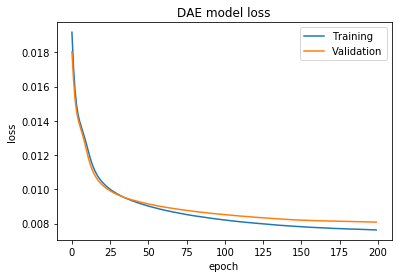

In [162]:
# DAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('DAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [163]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.008810
std,0.001723
min,0.007627
25%,0.007816
50%,0.008208
75%,0.009025
max,0.019170


In [164]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.009026
std,0.001489
min,0.008084
25%,0.008198
50%,0.008519
75%,0.009147
max,0.018025


In [165]:
# create encoded data
encoded_data = encoder.predict(x_test)
#decoded_data = decoder.predict(encoded_data)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [166]:
encoded_data.mean()

0.36931983

In [167]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.983365,0.0,0.0,0.0,1.794121,0.0,0.0,0.0,0.944839
1,0.0,0.0,0.0,2.009765,0.0,0.0,0.0,1.817123,0.0,0.0,0.0,0.959566
2,0.0,0.0,0.0,1.825023,0.0,0.0,0.0,1.666132,0.0,0.0,0.0,0.805290
3,0.0,0.0,0.0,1.757096,0.0,0.0,0.0,1.592825,0.0,0.0,0.0,0.761949
4,0.0,0.0,0.0,1.740648,0.0,0.0,0.0,1.586637,0.0,0.0,0.0,0.756928


In [169]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7,8
1995,0.0,0.0,1.700664,0.0,0.0,1.405238,0.0,0.0,0.917400
1996,0.0,0.0,1.557762,0.0,0.0,1.271051,0.0,0.0,0.864720
1997,0.0,0.0,1.456014,0.0,0.0,1.181055,0.0,0.0,0.777323
1998,0.0,0.0,1.485580,0.0,0.0,1.201317,0.0,0.0,0.741247
1999,0.0,0.0,1.563267,0.0,0.0,1.249660,0.0,0.0,0.901492


In [170]:
encoded_som_nonzero.to_csv(path_or_buf='./sat_DAE_encoded.csv',index= False)

# Convolutional Autoencoder

In [141]:
input_dim = x_train.shape[1]

# tranform the input format, add a dimension
x_train_con = x_train.as_matrix()
x_train_con = np.reshape(x_train_con, (-1, input_dim, 1))
x_text_con = x_test.as_matrix()
x_text_con = np.reshape(x_text_con, (-1, input_dim, 1))

input_layer = Input(shape=(input_dim,1))

x = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(2, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)


x = Conv1D(2, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 5, activation='sigmoid')(x)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')




In [142]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 36, 1)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 36, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 18, 16)            1552      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 9, 16)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 9, 2)              98        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 5, 2)              0         
__________

In [143]:
ae_train = autoencoder.fit(x_train_con, x_train_con,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_text_con, x_text_con),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]).history

Train on 4435 samples, validate on 2000 samples
Epoch 1/200
4435/4435 [==============================] - 1s 212us/step - loss: 0.0177 - val_loss: 0.0171
Epoch 2/200
4435/4435 [==============================] - 0s 96us/step - loss: 0.0149 - val_loss: 0.0131
Epoch 3/200
4435/4435 [==============================] - 0s 104us/step - loss: 0.0123 - val_loss: 0.0123
Epoch 4/200
4435/4435 [==============================] - 0s 95us/step - loss: 0.0117 - val_loss: 0.0118
Epoch 5/200
4435/4435 [==============================] - 0s 104us/step - loss: 0.0111 - val_loss: 0.0111
Epoch 6/200
4435/4435 [==============================] - 0s 106us/step - loss: 0.0102 - val_loss: 0.0099
Epoch 7/200
4435/4435 [==============================] - 0s 112us/step - loss: 0.0088 - val_loss: 0.0084
Epoch 8/200
4435/4435 [==============================] - 0s 108us/step - loss: 0.0077 - val_loss: 0.0078
Epoch 9/200
4435/4435 [==============================] - 1s 122us/step - loss: 0.0073 - val_loss: 0.0075
Epoch 10/

4435/4435 [==============================] - 1s 150us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 79/200
4435/4435 [==============================] - 1s 118us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 80/200
4435/4435 [==============================] - 0s 99us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 81/200
4435/4435 [==============================] - 0s 110us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 82/200
4435/4435 [==============================] - 1s 125us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 83/200
4435/4435 [==============================] - 0s 104us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 84/200
4435/4435 [==============================] - 0s 103us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 85/200
4435/4435 [==============================] - 0s 108us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 86/200
4435/4435 [==============================] - 0s 102us/step - loss: 0.0016 - val_loss: 0.0014
Epoch 87/200
4435/4435 [==============================] - 0s

4435/4435 [==============================] - 0s 98us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 156/200
4435/4435 [==============================] - 0s 98us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 157/200
4435/4435 [==============================] - 0s 98us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 158/200
4435/4435 [==============================] - 0s 104us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 159/200
4435/4435 [==============================] - 1s 132us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 160/200
4435/4435 [==============================] - 1s 123us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 161/200
4435/4435 [==============================] - 1s 137us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 162/200
4435/4435 [==============================] - 1s 124us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 163/200
4435/4435 [==============================] - 0s 109us/step - loss: 0.0014 - val_loss: 0.0014
Epoch 164/200
4435/4435 [=============================

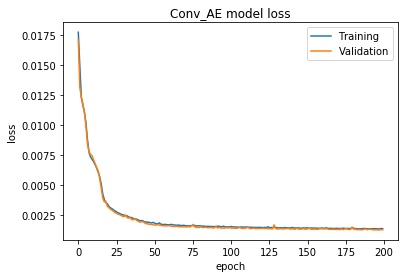

In [145]:
# Con_AE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('Conv_AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [146]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,200.000000
mean,0.002270
std,0.002299
min,0.001331
25%,0.001409
50%,0.001511
75%,0.001839
max,0.017745


In [147]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,200.000000
mean,0.002177
std,0.002251
min,0.001256
25%,0.001335
50%,0.001421
75%,0.001709
max,0.017128


In [56]:
encoded_data = encoder.predict(x_text_con)

In [57]:
encoded_data.shape

(2000, 5, 2)

In [58]:
# create encoded data

encoded_data = encoded_data.reshape(-1, 5*2)

# transform to SOM input type
encoded_som = pd.DataFrame(encoded_data)
#decoded_som = pd.DataFrame(decoded_data)

In [59]:
encoded_data.mean()

0.59157705

In [60]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.371149,0.0,1.593048,0.0,1.604938,0.0,1.623924,0.0,0.907349
1,0.0,1.409046,0.0,1.641388,0.0,1.646178,0.0,1.605050,0.0,0.924437
2,0.0,1.369724,0.0,1.446093,0.0,1.458377,0.0,1.394984,0.0,0.864227
3,0.0,1.305204,0.0,1.401067,0.0,1.391451,0.0,1.388346,0.0,0.843543
4,0.0,1.288046,0.0,1.379741,0.0,1.384114,0.0,1.367234,0.0,0.835359


In [61]:
nonzero = list(map(lambda i: any(encoded_data[:,i] != 0), range(encoded_data.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_data[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4
1995,1.138076,1.426342,1.437318,1.443515,0.682963
1996,1.002539,1.326898,1.377075,1.343874,0.645719
1997,0.852720,1.250983,1.299184,1.290081,0.663860
1998,0.956343,1.265429,1.296823,1.307425,0.646354
1999,0.889550,1.355648,1.330567,1.409474,0.612648


In [62]:
encoded_som_nonzero.to_csv(path_or_buf='./sat_ConAE_encoded.csv',index= False)